<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-\amily:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Gradient Descent
              
</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

In data science:
- Supervised learning
- Trying to train model or input/output predictive function
- Learn model parameters/weights.

Optimal weights/parameters:
    
- where defined cost function L is at a minimum.

With linear regression is squared loss:

$$ L =  |\textbf{y }- X \textbf{w} |^2 $$

for 1D linear regression is compact linear algebra notation for:

$$ L =  \sum_i|y_i - w_1 x_i - w_0 |^2 = \\ \sum_i|y_i - \hat{y}_i |^2  $$

Slope weight including bias. 

2D minimization problem.


Parameters:
- $w_0$, $w_1$

Let's find $w_0$ and $w_1$ that minimizes $L$:
- Minimize partial derivatives: 
-  $\frac{\partial L}{\partial w_0} = 0$ and $ \frac{\partial L}{\partial w_1} = 0 $

<img src = "images\local_minimum.jpg" width = 300 />

Minimum: partial derivates in **both** directions vanish

Import sympy and do some mathemagic:

In [1]:
from sympy import *
from sympy.abc import x,y

Define the loss function:

In [3]:
x, y, i, N, w0, w1 = symbols("x, y, i, N, w0, w1")
L = summation((Indexed('y',i) - Indexed('x',i)*w1 - w0)**2 ,(i,1,N))
L

Sum((-w0 - w1*x[i] + y[i])**2, (i, 1, N))

In [4]:
grad1 = diff(L, w0)
grad1

Sum(2*w0 + 2*w1*x[i] - 2*y[i], (i, 1, N))

In [5]:
grad2 = diff(L, w1)
grad2

Sum(-2*(-w0 - w1*x[i] + y[i])*x[i], (i, 1, N))

Setting grad1 to 0, solve for $w_0$:
$$ w_0 = \bar{y} - w_1\bar{x} $$

Plug in $w_0$, solve for $w_1$ setting grad2 to 0.

Algebra happened:


$$ w_1 = \frac{ \Big(\sum_i^Nx_iy_i) - N \bar{y}\bar{x} }{\Big(\sum_i^Nx_i^2\Big) - N \bar{x}^2}$$

With ordinary least squares linear regression: there's always a formula.
- Minimizing cost function
- Analytically find solution for model weights.

Can also use a computer to iteratively converge to minimum and get weights.

- Useful when you can't solve for weights analytically.
- When cost function as a function of fit parameters is complex.
- Most problems in machine learning.



**Solution: Gradient descent**

Look at it work for our simple linear regression:

<center><img src = "Images/simple_regression.gif" width = 500/></center>
<center>What's it doing?</center>

1. Randomly initialize weight vector $\textbf{w} = \textbf{w}^{(0)}$.
2. Compute cost function $J(\textbf{w}^{(0)})$.
2. Compute gradient of cost $J$: Gradient is in direction of highest slope.
3. Step weight vector in opposite direction for descent.

<center><img src = "Images/grad_desc_2d.png" width = 700/></center>


2. #### Engineering the weight vector step $\Delta \textbf{w}^{(0)}$

- step weight vector in opposite direction of gradient for descent.
- $\Delta \textbf{w}^{(0)}$ proportional to $ - \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}}$


$$ \textbf{w}^{(0)} \rightarrow \textbf{w}^{(0)} + \Delta \textbf{w}^{(0)} $$


$$ \textbf{w}^{(0)} \rightarrow \textbf{w}^{(0)} - \alpha \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$

i.e., 

$$ \Delta \textbf{w}^{(0)} = - \alpha \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}}$$

where $\alpha$ is a small parameter known as the **learning rate**.

Or component-wise:

$$ w_1^{(0)} \rightarrow w_1^{(0)} - \alpha \frac{\partial J}{\partial w_1}\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$


$$ w_2^{(0)} \rightarrow w_2^{(0)} - \alpha \frac{\partial J}{\partial w_2}\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$

<center><img src = "Images/grad_desc_2d.png" width = 700/></center>


Now at new weight vector $\textbf{w}^{(1)} = \begin{bmatrix}w_1^{(1)} & w_2^{(1)}\end{bmatrix} $
- Recompute cost function $J(w_1^{(1)}, w_2^{(1)})$
- Recompute gradient vector  $\nabla_\textbf{w} J\Big|_{\textbf{w} = \textbf{w}^{(1)}}$


- Take step down in opposite gradient direction: $$ \Delta \textbf{w}^{(1)} = - \alpha \nabla_\textbf{w} J\Big|_{\textbf{w} = \textbf{w}^{(1)}} $$
- Now we are at $\textbf{w} = \textbf{w}^{(2)}$

Pictorially, we are doing this at each step:

<center><img src = "Images/gradient_anim.gif" width = 700 /> <center>

Play this game, until weights converge to minimum:
- Closer to minimum: gradients gets small
- weight updates get vanishingly small.
- weights at/near optimal value.

Kill the loop. We are done.

<img src = "Images/simple_regression.gif" width = 500 /> 

- But let's do this ourselves. Step by step.
- First create some data

In [6]:
import statsmodels.api as sm
import numpy as np
# Randomly created data in x & y
np.random.seed(27)

X = np.random.rand(30, 1)
X = sm.add_constant(X) # add a constant
y = np.random.normal(0, 3, 30).reshape(-1,1)


Step 1: Initialize weights randomly

In [7]:
def init_weight(X):
    num_features = X.shape[1]
    w_0 = np.random.normal(loc =0 , 
                           scale = 4, 
                           size = (num_features,
                                   1))
    
    return w_0
    

In [8]:
w_0 = init_weight(X)
w_0

array([[-0.14356018],
       [-0.65190229]])

Step 2: Compute cost function

In [9]:
L

Sum((-w0 - w1*x[i] + y[i])**2, (i, 1, N))

In vector form with augmented $X$ is:
 $$ (\textbf{y} - X \textbf{w})^T(\textbf{y} - X \textbf{w}) = |\textbf{y} - X \textbf{w}|^2 $$ 

In [10]:
# in vectorized form 

def comp_cost(X, y, w):
    
    costfunc = (y - X@w).T @ (y - X@w)
    
    return costfunc[0][0]

In [11]:
comp_cost(X, y, w_0)

370.88335045802603

2. Define and compute the gradient:
    - $\nabla_\textbf{w} |\textbf{y}- X\textbf{w}|^2 = - 2 ( X^T\textbf{y} - X^TX \textbf{w} )$

In [12]:
def compute_gradient(X,y,w):
    
    grad = 2*((X.T@X)@w - X.T@y)
    
    return grad

In [13]:
q = compute_gradient(X,y,w_0)
q

array([[-111.59780406],
       [ -55.5929707 ]])

3. Update your weights in the right direction.

In [14]:
def update_weight(w, grad, learning_rate = 0.01):
    dw = - learning_rate*grad 
    w_new = w + dw
    
    return w_new
    

In [15]:
w_0

array([[-0.14356018],
       [-0.65190229]])

In [16]:
update_weight(w_0, q)

array([[ 0.97241786],
       [-0.09597258]])

Now do all this in a loop and store cost function values and gradients along the way:

In [17]:
def gradient_descent_optimizer(X, y, learning_rate = 0.01, num_iter = 250):
    
    #initialize
    J = {}
    grads = {}
    w_history = {}
    
    w = init_weight(X)
    
    for trial in range(num_iter):
        
        # compute and store cost in dictionary
        J[trial] = comp_cost(X, y ,w) 
        
        # compute the gradient of J at current w
        grads[trial] = compute_gradient(X, y, w)
        
        w = update_weight(w, grads[trial], learning_rate = learning_rate)
        w_history[trial] = w
        
    # return final weight and cache
    cache = {'cost': J, 'gradients': grads, 'weight_history': w_history}
    return w, cache
        

Let punch the button and run the gradient descent on our least squares problem:

In [18]:
w, cache = gradient_descent_optimizer(X, y, learning_rate = 0.005)

In [19]:
w

array([[ 2.0812013 ],
       [-1.34112543]])

In [20]:
cache['cost']

{0: 1087.413966753362,
 1: 573.3673315667468,
 2: 382.0274100569621,
 3: 310.7652584858595,
 4: 284.18510494007865,
 5: 274.2330364985171,
 6: 270.4704513919421,
 7: 269.0131861449842,
 8: 268.4159044526648,
 9: 268.1407301664389,
 10: 267.98744485405433,
 11: 267.88147138828197,
 12: 267.7949851994443,
 13: 267.71756065356794,
 14: 267.6452488291298,
 15: 267.57651338854146,
 16: 267.51071826413033,
 17: 267.4475648460096,
 18: 267.3868824714166,
 19: 267.3285503767326,
 20: 267.27246856863354,
 21: 267.2185469008237,
 22: 267.1667009281009,
 23: 267.11685028531633,
 24: 267.06891800883375,
 25: 267.02283021158036,
 26: 266.9785158924534,
 27: 266.93590679840077,
 28: 266.8949373086787,
 29: 266.8555443298404,
 30: 266.8176671971016,
 31: 266.7812475803702,
 32: 266.74622939421533,
 33: 266.7125587114217,
 34: 266.6801836799143,
 35: 266.64905444289707,
 36: 266.6191230620706,
 37: 266.5903434438071,
 38: 266.5626712681664,
 39: 266.5360639206443,
 40: 266.510480426547,
 41: 266.48588

A plot of the cost function as a function of iteration is helpful:

In [21]:
%%capture cost_plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

trials = cache['cost'].keys()
cost_history = cache['cost'].values()

fig, ax = plt.subplots()
sns.lineplot( x =trials, y = cost_history, marker = 's', linestyle = '--')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Cost function')
ax.set_title('Gradient descent: Cost Function')
plt.show()

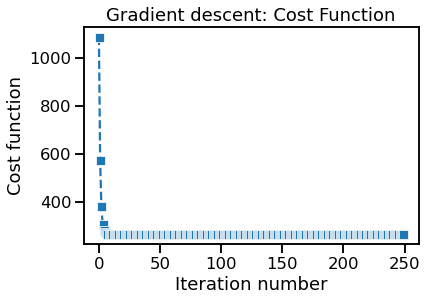

In [22]:
cost_plot()

Compare result of gradient descent with analytical calculation:

In [41]:
#gradient descent
w

array([[ 2.08023589],
       [-1.33942096]])

In [25]:
#formula
import numpy as np
w_analyt =np.linalg.solve(X.T@X, X.T@y)
w0_true, w1_true = w_analyt
w_analyt

array([[ 2.08579266],
       [-1.34923161]])

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = False)
lr.fit(X,y)
lr.coef_

array([[ 2.08579266, -1.34923161]])

Now let's look at how the weights get iteratively optimized.

In [23]:
w, cache = gradient_descent_optimizer(X, y, learning_rate = 0.001, num_iter = 1000)

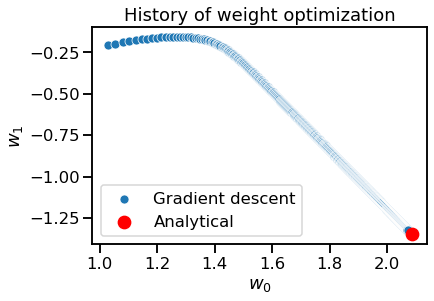

In [26]:
w_0list = []
w_1list = []
for iteration, weight in cache['weight_history'].items():
    w_0list.append(weight[0][0])
    w_1list.append(weight[1][0])

fig, ax = plt.subplots()
sns.scatterplot(x = w_0list, y = w_1list, ax = ax, label = 'Gradient descent')
ax.scatter(w0_true, w1_true, s = 150, c ='r', label = 'Analytical')
ax.set_ylabel('$w_1$')
ax.set_xlabel('$w_0$')
ax.legend()
ax.set_title('History of weight optimization')
plt.show()

Effect of the learning rate:
    
- Obviously affects step size

$$ \Delta \textbf{w} = - \alpha \nabla_\textbf{w} J$$

If our steps are _too big_, we risk skipping over the minimum value (optimal parameters).

If our steps are _too small_, it might take us too long to reach the minimum value.

![learning_rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

Optimization can be made better: 

- many ways to improve the way we take steps
- how we use our training data via sampling can help a lot


Most importantly

- Gradient descent:
    - will be using under the hood for most algorithms from now on.
    - but in many cases want to tune how algorithm optimizes
    - sometimes need to pop the hood and mess around.